In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
sns.set_context("talk")

In [46]:
# Load files 

# Stats about families 
families = pd.read_csv('/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/02_summary_homfam_with_refs.csv')
families = families[["file_ref","n_sequences_ref"]].set_axis(["family","n_sequences_ref"], axis='columns')
families.family = families.family.str.replace('.', "-", regex = False)

# Hits
hits_path = "/home/luisasantus/Desktop/crg_cluster/projects/nf-core-getstructures/outdir/mmseqs/id_0.9_cov_1_covtype_2_kmermatching_null/search_output/*.m8"

In [60]:
# Check how many structures I retrieve
colnames = ["query","target","fident","alnlen","mismatch","gapopen","qstart","qend","tstart","tend","evalue","bits","qcov","tcov", "family"]
hits_summary = pd.DataFrame()
for file in glob.glob(hits_path):
    family = os.path.splitext(os.path.basename(file))[0]
    if os.path.getsize(file) == 0:
        print("No structures found for: ")
        print(family)
    if os.path.getsize(file) > 0: 
        df = pd.read_csv(file, sep= "\t", header = None)
        df["family"] = family
        hits_summary = pd.concat([hits_summary, df])
hits_summary = hits_summary.set_axis(colnames, axis='columns')

No structures found for: 
rhv-ref


In [76]:
hits = hits_summary[["family", "query"]].drop_duplicates().groupby("family").count().reset_index().set_axis(["family", "found"], axis='columns')
hits = families.merge(hits, on = "family", how = "left").fillna(0)
hits["missing"] = hits.n_sequences_ref - hits.found

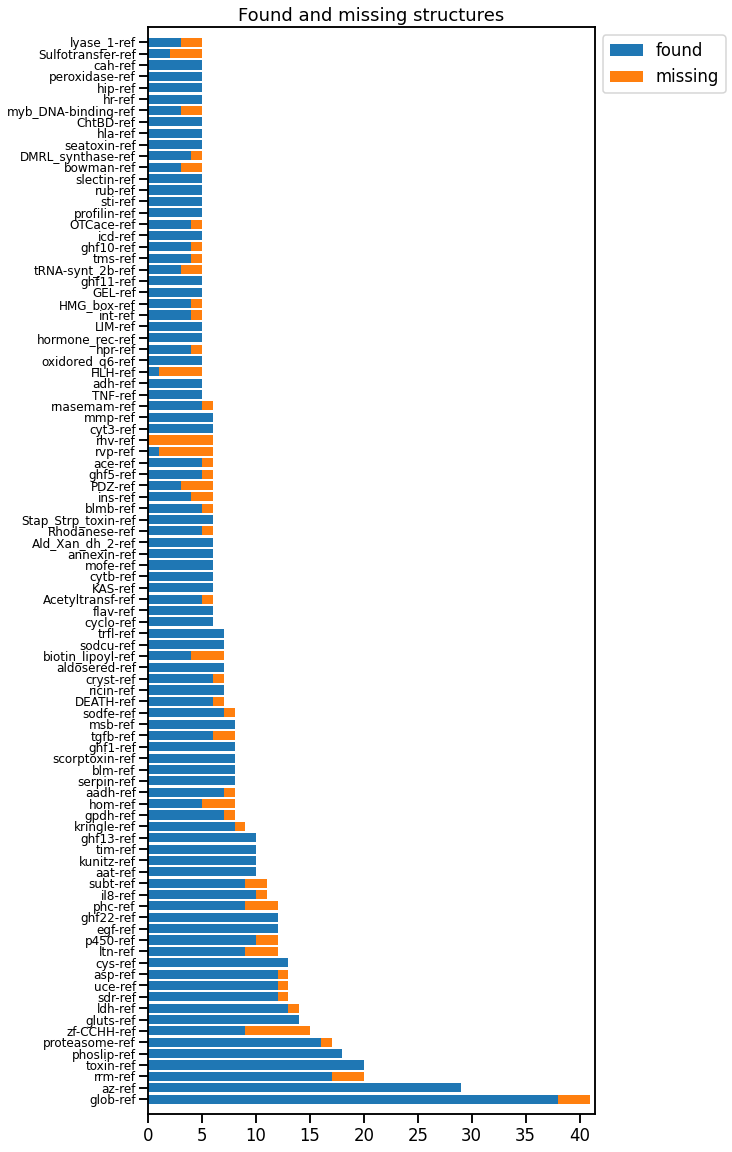

In [123]:
# Sort 
hits = hits.sort_values(by='n_sequences_ref', ascending=False)
# Plot 
plt.figure(figsize=(8, 20))
plt.barh(hits.family, hits.found, label = "found")
plt.barh(hits.family, hits.missing, left= hits.found, label = "missing")
plt.title("Found and missing structures")
plt.margins(0.01)
plt.yticks(fontsize=12)
plt.legend(loc = "upper left", bbox_to_anchor=(1, 1))
plt.show()
